# SVM & Naïve Bayes Assignment Solutions



---



### **1. What is a Support Vector Machine (SVM)?**

A **Support Vector Machine (SVM)** is a powerful, supervised machine learning algorithm primarily used for **classification** and **regression** tasks. In classification, the goal of an SVM is to find an optimal **hyperplane** that distinctly separates the data points of different classes in the feature space. The "optimal" hyperplane is the one with the largest **margin**—the maximum distance between the decision boundary and the nearest training data points from any class.

### **2. What is the difference between Hard Margin and Soft Margin SVM?**

The difference lies in how they handle **non-linearly separable data** and **outliers**:

| Feature | **Hard Margin SVM** | **Soft Margin SVM** |
| :--- | :--- | :--- |
| **Separability** | Assumes the data is **perfectly linearly separable**. | Handles data that is **not perfectly linearly separable**. |
| **Tolerance for Errors**| **Zero tolerance** for misclassification (no data point can be inside the margin or on the wrong side of the hyperplane). | **Allows** for some misclassification or data points to fall within the margin (errors) by using **slack variables** ($\xi_i$). |
| **Robustness to Outliers**| Highly **sensitive** to outliers. A single outlier can drastically change the optimal hyperplane. | More **robust** to outliers. The optimal hyperplane is less affected by a few misclassified points. |
| **Primary Use** | Used when it's certain the data is perfectly separable and overfitting is less of a concern. | Used in **most real-world scenarios** where noise and non-separability are common. |



### **3. What is the mathematical intuition behind SVM?**

The mathematical intuition behind SVM is to find the **optimal separating hyperplane** by maximizing the margin.

1.  **Hyperplane Equation:** A hyperplane is defined by the equation $\mathbf{w} \cdot \mathbf{x} + b = 0$, where $\mathbf{w}$ is the **weight vector** (normal to the hyperplane) and $b$ is the **bias term**.
2.  **Margin Maximization:** The distance between the two hyperplanes parallel to the optimal one, which pass through the closest data points (Support Vectors), is $\frac{2}{\|\mathbf{w}\|}$. Maximizing this distance is equivalent to **minimizing** the squared norm of the weight vector, $\frac{1}{2} \|\mathbf{w}\|^2$.
3.  **Constraint:** The model is constrained by the condition that all training points must be correctly classified (outside the margin). For each data point $\mathbf{x}_i$ with label $y_i \in \{-1, 1\}$, the constraint is $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$ (for Hard Margin SVM).
4.  **Optimization:** This leads to a **constrained optimization problem**: **Minimize** $\frac{1}{2} \|\mathbf{w}\|^2$ subject to $y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1$. This is solved using **Lagrange Multipliers**.

### **4. What is the role of Lagrange Multipliers in SVM?**

**Lagrange Multipliers** ($\alpha_i$) are used to solve the constrained optimization problem of SVM. They are a technique to find the minimum or maximum of a function subject to equality or inequality constraints.

* **Conversion:** They allow the constrained **primal optimization problem** (minimizing $\frac{1}{2}\|\mathbf{w}\|^2$ subject to the classification constraints) to be converted into an unconstrained **dual optimization problem**.
* **Support Vector Identification:** Crucially, the non-zero Lagrange Multipliers ($\alpha_i > 0$) correspond **exactly** to the data points that lie on or inside the margin—these are the **Support Vectors**. Data points not on the margin have $\alpha_i = 0$ and do not influence the final model.

### **5. What are Support Vectors in SVM?**

**Support Vectors** are the **data points** from the training set that are **closest** to the optimal separating hyperplane.

* They are the points that lie on the margin boundaries or violate the margin (in the case of Soft Margin SVM).
* They are the only points that contribute to the definition of the separating hyperplane; if any other non-Support Vector data points are removed, the resulting hyperplane **will not change**. This property makes SVM computationally efficient, as the decision boundary is determined by a small subset of the training data.



### **6. What is a Support Vector Classifier (SVC)?**

A **Support Vector Classifier (SVC)** is the term used for the application of SVM to **classification problems**.

* Its primary goal is to find the **optimal separating hyperplane** to divide the data into different classes while maximizing the margin.
* The output is a **class label** (e.g., $-1$ or $1$). The terms "SVM" and "SVC" are often used interchangeably when discussing classification.

### **7. What is a Support Vector Regressor (SVR)?**

A **Support Vector Regressor (SVR)** is the application of SVM to **regression problems**.

* Instead of finding a hyperplane that separates classes, SVR finds a hyperplane that best **fits** the data points within a defined margin of tolerance, $\epsilon$ (epsilon).
* The goal is to find a function $f(\mathbf{x})$ such that at most a maximum deviation $\epsilon$ is allowed from the true target $y$ for all training data, while simultaneously keeping the model complexity (measured by $\|\mathbf{w}\|^2$) as low as possible.
* The output is a **continuous value**.

### **8. What is the Kernel Trick in SVM?**

The **Kernel Trick** is a technique used in SVM to handle **non-linearly separable data** without explicitly transforming the data into a higher-dimensional feature space.

* **Core Idea:** It replaces the dot product $\mathbf{x}_i \cdot \mathbf{x}_j$ in the dual optimization formulation with a **Kernel Function**, $K(\mathbf{x}_i, \mathbf{x}_j)$.
* **Effect:** The kernel function calculates the **similarity** between two data points *as if* they had been mapped to a higher-dimensional space where they *are* linearly separable.
* **Computational Benefit:** This avoids the computational expense of explicitly computing the coordinates of the data points in the high-dimensional feature space, which could be infinite-dimensional.



### **9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**

These are three of the most common kernel functions used in SVM:

| Kernel | Formula (Conceptual) | Use Case | Advantages | Disadvantages |
| :--- | :--- | :--- | :--- | :--- |
| **Linear** | $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j$ | Best for **linearly separable** data. | Simple, fastest, and fewer hyperparameters to tune. | Cannot handle non-linear data well. |
| **Polynomial** | $K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma (\mathbf{x}_i \cdot \mathbf{x}_j) + r)^d$ (where $d$ is the degree) | Suitable for data with a **non-linear, curved boundary**. | Can learn complex decision boundaries. | High degree ($d$) can lead to **overfitting** and be computationally slow. |
| **Radial Basis Function (RBF) / Gaussian**| $K(\mathbf{x}_i, \mathbf{x}_j) = e^{-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2}$ | Most common default. Suitable for **complex, non-linear boundaries** when the relationship is not known beforehand. | Very powerful; can separate points in an **infinite-dimensional** space. | Has two key hyperparameters ($\gamma$ and $C$) that must be tuned well; can easily **overfit** if $\gamma$ is too high. |

### **10. What is the effect of the C parameter in SVM?**

The **C parameter** is a hyperparameter in **Soft Margin SVM** that controls the **penalty** for misclassified training observations. It determines the trade-off between maximizing the margin and minimizing the classification error (misclassifications).

* **Small C:**
    * **Less penalty** for misclassification errors.
    * Leads to a **wider margin** and potentially more misclassifications (higher bias, lower variance).
    * Favors **simplicity** and is more resistant to outliers, potentially leading to **underfitting**.
* **Large C:**
    * **High penalty** for misclassification errors.
    * Leads to a **narrower margin** and fewer training errors (lower bias, higher variance).
    * Tries harder to classify all points correctly, increasing the risk of **overfitting** to noisy data.

### **11. What is the role of the Gamma parameter in RBF Kernel SVM?**

The **Gamma ($\gamma$) parameter** is a hyperparameter specifically used with the **RBF (Radial Basis Function)** kernel. It defines the **influence** of a single training example on the decision boundary.

* **Small $\gamma$:**
    * A single training example has a **large radius of influence**, affecting data points far away.
    * The decision boundary is **smoother** and less complex.
    * Leads to a higher risk of **underfitting**.
* **Large $\gamma$:**
    * A single training example has a **small radius of influence**, only affecting points very close to it.
    * The decision boundary becomes **highly irregular** and complex, trying to enclose every data point closely.
    * Leads to a higher risk of **overfitting**.

### **12. What is the Naïve Bayes classifier, and why is it called "Naïve"?**

The **Naïve Bayes classifier** is a collection of probabilistic classification algorithms based on **Bayes' Theorem**. It works by calculating the probability of a given data point belonging to a particular class.

It is called **"Naïve"** because it makes a simplifying and often unrealistic **Naïve assumption**:

> **The features are conditionally independent** given the class label.

In simpler terms, it assumes that the presence (or absence) of a particular feature in a class is **unrelated** to the presence (or absence) of any other feature, *regardless* of their true correlation in the real world. Despite this oversimplification, Naïve Bayes often performs surprisingly well in practice.

### **13. What is Bayes' Theorem?**

**Bayes' Theorem** is a fundamental theorem in probability that describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

The formula is:
$$\text{P}(A|B) = \frac{\text{P}(B|A) \cdot \text{P}(A)}{\text{P}(B)}$$

Where:
* $\text{P}(A|B)$ is the **Posterior Probability**: The probability of hypothesis $A$ being true, given that event $B$ has occurred.
* $\text{P}(B|A)$ is the **Likelihood**: The probability of observing evidence $B$, given that hypothesis $A$ is true.
* $\text{P}(A)$ is the **Prior Probability**: The initial probability of hypothesis $A$ being true before any evidence is collected.
* $\text{P}(B)$ is the **Evidence**: The probability of observing the evidence $B$.

In the context of Naïve Bayes, $A$ is the **class** and $B$ is the **features** (evidence).

### **14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**

These are the three most popular variants of the Naïve Bayes classifier, each defined by the underlying **distribution assumption** of the features:

| Variant | Feature Type | Distribution Assumption | Primary Use Case |
| :--- | :--- | :--- | :--- |
| **Gaussian Naïve Bayes** | **Continuous** (Real-valued numbers, e.g., height, weight). | Assumes features follow a **Normal (Gaussian) distribution** for each class. | Used when features are measured on a continuous scale (e.g., Iris, Breast Cancer datasets). |
| **Multinomial Naïve Bayes** | **Discrete** (Integer counts, e.g., word counts in a document). | Assumes features follow a **Multinomial distribution** (e.g., number of times a word appears in a text). | Primarily used for **Text Classification** (e.g., counting word occurrences in documents). |
| **Bernoulli Naïve Bayes** | **Binary/Boolean** (Dichotomous, values 0 or 1). | Assumes features are independent **Bernoulli trials** (i.e., whether a specific feature is present or absent). | Suitable for binary classification or when features are binary (e.g., checking if a word *exists* in a document). |

### **15. When should you use Gaussian Naïve Bayes over other variants?**

You should use **Gaussian Naïve Bayes** when your features are **continuous, real-valued numbers** and you believe (or assume) that these features follow a **normal (Gaussian) distribution** within each class.

* **Example:** For a dataset like the Iris dataset, where features are continuous measurements (e.g., sepal length, petal width), Gaussian Naïve Bayes is appropriate.
* If the continuous features are clearly non-Gaussian, a transformation might be needed, or another classifier may be preferred, but Gaussian Naïve Bayes is the standard choice for continuous data in the Naïve Bayes family.

### **16. What are the key assumptions made by Naïve Bayes?**

Naïve Bayes makes two primary assumptions:

1.  **The Naïve Independence Assumption:** The features are **conditionally independent** of each other given the class label.
    * Mathematically: $\text{P}(x_1, x_2, \dots, x_n | C) = \text{P}(x_1|C) \cdot \text{P}(x_2|C) \cdot \dots \cdot \text{P}(x_n|C)$.
2.  **Feature Distribution Assumption:** Each variant of Naïve Bayes assumes a specific **probability distribution** for the features given the class.
    * **Gaussian:** Features are normally distributed.
    * **Multinomial:** Features are word/event counts (multinomial distribution).
    * **Bernoulli:** Features are binary (Bernoulli distribution).

### **17. What are the advantages and disadvantages of Naïve Bayes?**

| Advantages | Disadvantages |
| :--- | :--- |
| **Fast and Efficient:** Training and prediction are very fast, even with large datasets. | **Strong Naïve Assumption:** The core assumption of feature independence is often violated in real-world data, which can hurt performance. |
| **Requires Less Training Data:** It can perform well even with relatively small amounts of training data. | **Zero Frequency Problem:** If a category/word is not present in the training data, the probability becomes zero, and the entire posterior probability becomes zero (mitigated by Laplace Smoothing). |
| **Scalable:** It scales linearly with the number of features and data points. | **Poor Estimator of Probabilities:** The probability outputs are often highly biased and shouldn't be relied upon for absolute values. |
| **Easy to Implement:** It is straightforward to understand and code. | |

### **18. Why is Naïve Bayes a good choice for text classification?**

Naïve Bayes is an excellent baseline choice for text classification tasks (like spam detection, sentiment analysis) for several reasons:

* **Handling High Dimensionality:** Text data (like Bag-of-Words vectors) is typically very high-dimensional (many unique words/features). Naïve Bayes handles this well because the independence assumption simplifies the calculations.
* **Speed:** It's very fast to train and predict, making it ideal for processing large text corpora efficiently.
* **Simplicity:** The underlying probabilistic model is simple and easy to interpret.
* **Multinomial Naïve Bayes** is specifically designed for count-based data, which is standard for text features.

### **19. Compare SVM and Naïve Bayes for classification tasks.**

| Feature | **Support Vector Machine (SVM)** | **Naïve Bayes (NB)** |
| :--- | :--- | :--- |
| **Model Type** | Discriminative (Finds the boundary between classes). | Generative (Models the distribution of features for each class). |
| **Underlying Math**| Finds a max-margin hyperplane using optimization (Lagrange Multipliers). | Based on Bayes' Theorem and feature probability distributions. |
| **Speed** | Can be slower to train, especially on very large datasets without proper kernel/solver selection. | Generally **much faster** to train and predict. |
| **Kernel Trick** | Highly effective for handling **non-linear** data. | Cannot directly handle non-linearity without feature engineering. |
| **Handling Correlated Features** | Less affected by highly correlated features. | Performance significantly degrades if the independence assumption is violated (i.e., features are highly correlated). |
| **Probability Output**| Produces class scores; probability outputs are less reliable and require extra work (e.g., Platt scaling). | Provides **direct probability estimates** (though often biased). |
| **Performance** | Usually achieves **higher accuracy** when data is linearly separable or when the Kernel Trick is applicable. | Excellent baseline; good performance even on small data, especially for text. |

### **20. How does Laplace Smoothing help in Naïve Bayes?**

**Laplace Smoothing** (also known as Additive Smoothing) is a technique used in Naïve Bayes, particularly in the Multinomial and Bernoulli variants, to address the **Zero Frequency Problem**.

* **The Problem:** If a particular feature value (e.g., a word in text classification) never appears with a specific class in the training data, its likelihood $\text{P}(\text{Feature} | \text{Class})$ becomes **zero**. Since all likelihoods are multiplied to calculate the posterior probability, a single zero causes the entire product to become zero, rendering the model unable to make a meaningful prediction for that class.
* **The Solution (Laplace Smoothing):** It adds a small number (typically 1, $\alpha=1$) to the count of every feature value and adjusts the denominator accordingly.

$$\text{P}(x_i|C) = \frac{\text{Count}(x_i, C) + \alpha}{\text{Count}(C) + \alpha \cdot \text{Vocabulary Size}}$$

By doing this, the counts are never zero, ensuring the probability is never zero, and thus allowing the model to make predictions.

***## 💻 Practical Questions: Python Programs (Q21-Q46)***

### Setup and Imports
Run this cell first to import necessary libraries and load common datasets.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, log_loss, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, balanced_accuracy_score
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_20newsgroups, make_regression, make_classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from collections import Counter

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

---## 21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy.

In [29]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (good practice for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier (using RBF kernel as a common default)
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("### SVM Classifier on Iris Dataset ###")
print(f"Accuracy: {accuracy:.4f}")
print("-" * 40)

### SVM Classifier on Iris Dataset ###
Accuracy: 1.0000
----------------------------------------


---## 22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies.

In [30]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Linear Kernel SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)

# 2. RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("### SVM Kernel Comparison on Wine Dataset ###")
print(f"Accuracy (Linear Kernel): {acc_linear:.4f}")
print(f"Accuracy (RBF Kernel): {acc_rbf:.4f}")
print("-" * 40)
if acc_linear > acc_rbf:
    print("Linear Kernel performed better.")
elif acc_rbf > acc_linear:
    print("RBF Kernel performed better.")
else:
    print("Both Kernels performed equally well.")

### SVM Kernel Comparison on Wine Dataset ###
Accuracy (Linear Kernel): 0.9815
Accuracy (RBF Kernel): 0.9815
----------------------------------------
Both Kernels performed equally well.


---## 23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).

In [31]:
# Using a synthetic dataset as a simple "housing" example

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=10, noise=0.5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features (MinMaxScaler is often preferred for SVR)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR (using RBF kernel as a common default)
# C=10 and epsilon=0.1 are common starting hyperparameters
svr_rbf = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svr_rbf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("### SVR on Synthetic Regression Dataset ###")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print("-" * 40)

### SVR on Synthetic Regression Dataset ###
Mean Squared Error (MSE): 5827.1616
----------------------------------------


---## 24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary.

### SVM with Polynomial Kernel Decision Boundary ###


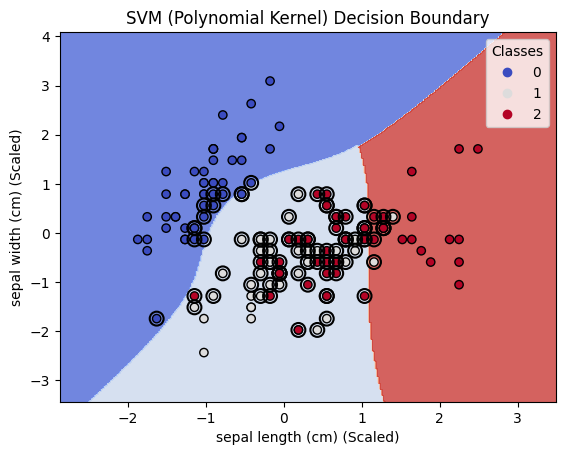

In [32]:
# Using the Iris dataset for visualization (only first two features for 2D plot)
iris = load_iris()
X = iris.data[:, :2]  # Sepal length and Sepal width
y = iris.target

# Define the plotting function (needed for Q24 and Q27)
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                    facecolors='none', edgecolors='black', label='Support Vectors', linewidth=1.5)

    # Attempt to use feature names if possible
    try:
        plt.xlabel(f'{iris.feature_names[0]} (Scaled)')
        plt.ylabel(f'{iris.feature_names[1]} (Scaled)')
    except:
        plt.xlabel('Feature 1 (Scaled)')
        plt.ylabel('Feature 2 (Scaled)')

    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()


# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM Classifier with Polynomial Kernel (degree=3 is common)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_scaled, y)

print("### SVM with Polynomial Kernel Decision Boundary ###")
plot_decision_boundary(X_scaled, y, svm_poly, "SVM (Polynomial Kernel) Decision Boundary")

---## 25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.

In [33]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("### Gaussian Naïve Bayes on Breast Cancer Dataset ###")
print(f"Accuracy: {accuracy:.4f}")
print("-" * 40)

### Gaussian Naïve Bayes on Breast Cancer Dataset ###
Accuracy: 0.9415
----------------------------------------


---## 26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

In [34]:
# Load 20 Newsgroups dataset (a subset for simplicity)
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Vectorize the text data using CountVectorizer for MultinomialNB (Count-based)
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
X_test_counts = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Train Multinomial Naive Bayes Classifier
mnb = MultinomialNB(alpha=1.0) # alpha=1.0 is the default and represents Laplace Smoothing
mnb.fit(X_train_counts, y_train)

# Predict and evaluate
y_pred = mnb.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)

print("### Multinomial Naïve Bayes for Text Classification (20 Newsgroups) ###")
print(f"Accuracy: {accuracy:.4f}")
print("-" * 40)

### Multinomial Naïve Bayes for Text Classification (20 Newsgroups) ###
Accuracy: 0.9341
----------------------------------------


---## 27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.

### SVM with Different C Values Visual Comparison ###


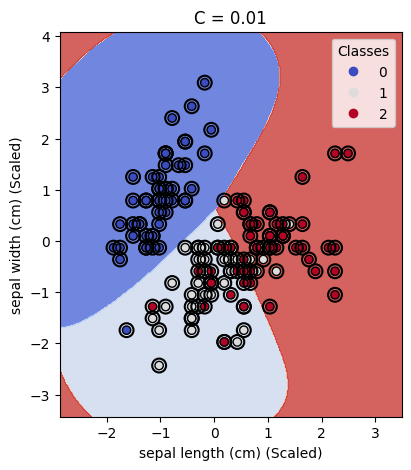

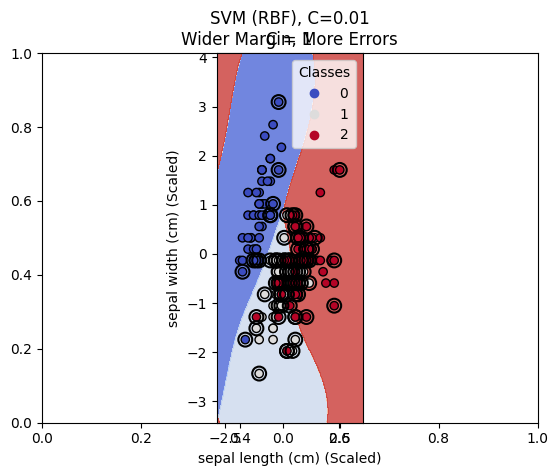

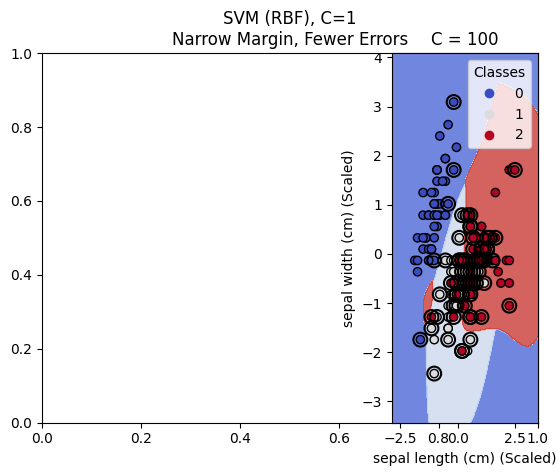

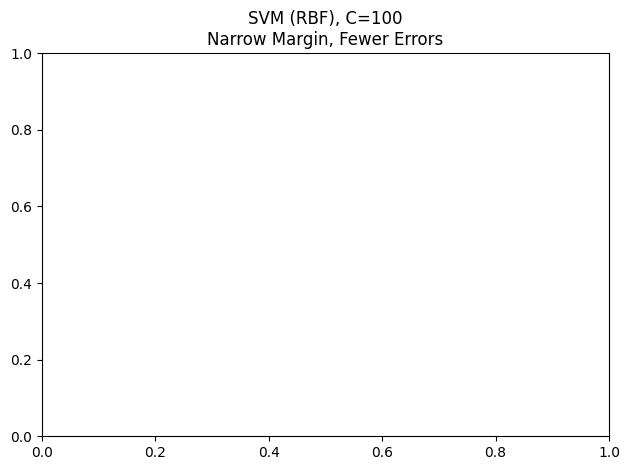

----------------------------------------


In [35]:
# Use Iris dataset (2 features) for visualization
iris = load_iris()
X = iris.data[:, :2]  # Sepal length and Sepal width
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different C values
C_values = [0.01, 1, 100]

plt.figure(figsize=(15, 5))
print("### SVM with Different C Values Visual Comparison ###")

# NOTE: The `plot_decision_boundary` function is defined in Q24 and is used here

for i, C in enumerate(C_values):
    # Train SVM Classifier (RBF kernel for non-linear boundary)
    svm_clf = SVC(kernel='rbf', C=C, random_state=42)
    svm_clf.fit(X_scaled, y)

    plt.subplot(1, 3, i + 1)
    plot_decision_boundary(X_scaled, y, svm_clf, f"C = {C}")
    plt.title(f"SVM (RBF), C={C}\n{'Wider Margin, More Errors' if C < 1 else 'Narrow Margin, Fewer Errors'}")

plt.tight_layout()
plt.show()
print("-" * 40)

---## 28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

In [36]:
# Create a synthetic dataset with binary features
X_synth, y_synth = make_classification(n_samples=500, n_features=5, n_informative=3, n_redundant=0,
                                       n_classes=2, random_state=42)

# Convert continuous features to binary features (e.g., above/below mean)
X_binary = (X_synth > np.mean(X_synth, axis=0)).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_synth, test_size=0.3, random_state=42)

# Train Bernoulli Naive Bayes Classifier
# binarize=None because the data is already 0/1
bnb = BernoulliNB(alpha=1.0, binarize=None)
bnb.fit(X_train, y_train)

# Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("### Bernoulli Naïve Bayes on Binary Feature Dataset ###")
print(f"Accuracy: {accuracy:.4f}")
print("-" * 40)

### Bernoulli Naïve Bayes on Binary Feature Dataset ###
Accuracy: 0.9067
----------------------------------------


---## 29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

In [37]:
# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train SVM with **UNSCALED** data
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
acc_unscaled = accuracy_score(y_test, svm_unscaled.predict(X_test))

# 2. Train SVM with **SCALED** data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, svm_scaled.predict(X_test_scaled))

print("### SVM Performance Comparison: Scaled vs. Unscaled Data ###")
print(f"Accuracy (Unscaled Data): {acc_unscaled:.4f}")
print(f"Accuracy (Scaled Data): {acc_scaled:.4f}")
print("\nScaling significantly impacts SVM (especially RBF) because the distance calculation is feature-scale dependent.")
print("-" * 40)

### SVM Performance Comparison: Scaled vs. Unscaled Data ###
Accuracy (Unscaled Data): 0.7593
Accuracy (Scaled Data): 0.9815

Scaling significantly impacts SVM (especially RBF) because the distance calculation is feature-scale dependent.
----------------------------------------


---## 30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

In [38]:
# Note: GaussianNB does not directly use Laplace Smoothing.
# We use MultinomialNB with a simple count-based dataset to demonstrate the classic effect of Laplace Smoothing (alpha parameter).

# Create synthetic count data for MNB where one category might have a zero count in a class
X_mnb = np.array([
    [1, 0, 0], [10, 1, 0], [1, 0, 1],
    [0, 5, 0], [0, 1, 1], [0, 1, 0]
])
y_mnb = np.array([0, 0, 0, 1, 1, 1])

# 1. Train MNB **WITHOUT** Smoothing (alpha=0.0)
mnb_no_smooth = MultinomialNB(alpha=0.0)
mnb_no_smooth.fit(X_mnb, y_mnb)

# 2. Train MNB **WITH** Smoothing (alpha=1.0)
mnb_with_smooth = MultinomialNB(alpha=1.0)
mnb_with_smooth.fit(X_mnb, y_mnb)

# Test sample: A sample with feature 2 present, [0, 0, 1]
test_sample = np.array([[0, 0, 1]])

print("### Multinomial Naïve Bayes: Laplace Smoothing Comparison ###")
try:
    pred_no_smooth = mnb_no_smooth.predict(test_sample)
    pred_proba_no_smooth = mnb_no_smooth.predict_proba(test_sample)
    print("--- No Smoothing (alpha=0.0) ---")
    print(f"Prediction: {pred_no_smooth}")
    log_proba_no_smooth = mnb_no_smooth.predict_log_proba(test_sample)
    print(f"Log Probabilities (Class 0, Class 1): {log_proba_no_smooth[0]}")
except ValueError as e:
    print("--- No Smoothing (alpha=0.0) ---")
    print(f"Prediction Error (expected, as P(F2|Class 1)=0): {e}")

print("\n--- With Smoothing (alpha=1.0) ---")
pred_with_smooth = mnb_with_smooth.predict(test_sample)
pred_proba_with_smooth = mnb_with_smooth.predict_proba(test_sample)
log_proba_with_smooth = mnb_with_smooth.predict_log_proba(test_sample)
print(f"Prediction: {pred_with_smooth}")
print(f"Probabilities (Class 0, Class 1): {pred_proba_with_smooth[0]}")
print(f"Log Probabilities (Class 0, Class 1): {log_proba_with_smooth[0]}")
print("\nSmoothing prevents zero probabilities, allowing a valid prediction.")
print("-" * 40)

### Multinomial Naïve Bayes: Laplace Smoothing Comparison ###
--- No Smoothing (alpha=0.0) ---
Prediction: [1]
Log Probabilities (Class 0, Class 1): [nan nan]

--- With Smoothing (alpha=1.0) ---
Prediction: [1]
Probabilities (Class 0, Class 1): [0.39285714 0.60714286]
Log Probabilities (Class 0, Class 1): [-0.93430924 -0.49899117]

Smoothing prevents zero probabilities, allowing a valid prediction.
----------------------------------------


---## 31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).

In [39]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid to search
param_grid = [
    {'C': [0.1, 1, 10], 'kernel': ['linear']}, # Linear kernel has no gamma
    {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']} # RBF kernel requires gamma
]

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("### SVM Hyperparameter Tuning with GridSearchCV ###")
print(f"Best Hyperparameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Test Set Accuracy with Best Model: {accuracy:.4f}")
print("-" * 40)

### SVM Hyperparameter Tuning with GridSearchCV ###
Best Hyperparameters found: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.9748
Test Set Accuracy with Best Model: 0.9825
----------------------------------------


---## 32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy.

In [40]:
# Create a synthetic imbalanced dataset
X_imb, y_imb = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                   n_redundant=0, n_classes=2, n_clusters_per_class=1,
                                   weights=[0.9, 0.1], flip_y=0, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.3, random_state=42)
print("Training set class distribution:", Counter(y_train))

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM **WITHOUT** Class Weighting
svm_no_weights = SVC(kernel='linear', random_state=42)
svm_no_weights.fit(X_train_scaled, y_train)
y_pred_no = svm_no_weights.predict(X_test_scaled)
acc_no = accuracy_score(y_test, y_pred_no)
bal_acc_no = balanced_accuracy_score(y_test, y_pred_no)

# 2. SVM **WITH** Class Weighting (using 'balanced' mode)
svm_with_weights = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_with_weights.fit(X_train_scaled, y_train)
y_pred_with = svm_with_weights.predict(X_test_scaled)
acc_with = accuracy_score(y_test, y_pred_with)
bal_acc_with = balanced_accuracy_score(y_test, y_pred_with)

print("\n### SVM with Class Weighting for Imbalanced Data ###")
print(f"Class 0 weight (majority): {svm_with_weights.class_weight_[0]:.2f}")
print(f"Class 1 weight (minority): {svm_with_weights.class_weight_[1]:.2f}")

print("\nPerformance Comparison:")
print(f"Accuracy (No Weights):      {acc_no:.4f}")
print(f"Balanced Accuracy (No Weights):   {bal_acc_no:.4f}")
print(f"Accuracy (With Weights):    {acc_with:.4f}")
print(f"Balanced Accuracy (With Weights): {bal_acc_with:.4f}")
print("For imbalanced data, Balanced Accuracy is a better metric.")
print("-" * 40)

Training set class distribution: Counter({np.int64(0): 629, np.int64(1): 71})

### SVM with Class Weighting for Imbalanced Data ###
Class 0 weight (majority): 0.56
Class 1 weight (minority): 4.93

Performance Comparison:
Accuracy (No Weights):      0.9967
Balanced Accuracy (No Weights):   0.9828
Accuracy (With Weights):    0.9900
Balanced Accuracy (With Weights): 0.9945
For imbalanced data, Balanced Accuracy is a better metric.
----------------------------------------


---## 33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [41]:
# Using a subset of 20 Newsgroups as a proxy for 'email data'

# Load relevant categories (treating two as "Ham" and two as "Spam" proxy)
categories_spam = ['misc.forsale', 'talk.politics.mideast'] # Treated as "Spam" (Class 1)
categories_ham = ['rec.sport.baseball', 'rec.motorcycles'] # Treated as "Ham" (Class 0)
categories_binary = categories_ham + categories_spam

newsgroups_train_spam = fetch_20newsgroups(subset='train', categories=categories_binary, shuffle=True, random_state=42)
newsgroups_test_spam = fetch_20newsgroups(subset='test', categories=categories_binary, shuffle=True, random_state=42)

# Re-label the targets to 0 (Ham) and 1 (Spam) based on the order of categories
y_train_spam = (newsgroups_train_spam.target >= 2).astype(int)
y_test_spam = (newsgroups_test_spam.target >= 2).astype(int)

# Use TfidfVectorizer (often performs better than simple counts)
vectorizer_spam = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer_spam.fit_transform(newsgroups_train_spam.data)
X_test_tfidf = vectorizer_spam.transform(newsgroups_test_spam.data)

# Train Multinomial Naive Bayes Classifier (standard for text)
mnb_spam = MultinomialNB(alpha=1.0)
mnb_spam.fit(X_train_tfidf, y_train_spam)

# Predict and evaluate
y_pred_spam = mnb_spam.predict(X_test_tfidf)
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)
precision_spam = precision_score(y_test_spam, y_pred_spam)
recall_spam = recall_score(y_test_spam, y_pred_spam)

print("### Multinomial Naïve Bayes for Spam Detection (20 Newsgroups Proxy) ###")
print(f"Accuracy: {accuracy_spam:.4f}")
print(f"Precision (Spam): {precision_spam:.4f}")
print(f"Recall (Spam): {recall_spam:.4f}")
print("-" * 40)

### Multinomial Naïve Bayes for Spam Detection (20 Newsgroups Proxy) ###
Accuracy: 0.9846
Precision (Spam): 0.9883
Recall (Spam): 0.9806
----------------------------------------


---## 34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

In [42]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train SVM Classifier (RBF kernel)
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
acc_svm = accuracy_score(y_test, svm_clf.predict(X_test_scaled))

# 2. Train Gaussian Naive Bayes Classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train) # Naive Bayes typically uses unscaled data
acc_gnb = accuracy_score(y_test, gnb_clf.predict(X_test))

print("### SVM vs. Naïve Bayes Accuracy Comparison (Iris Dataset) ###")
print(f"Accuracy (SVM Classifier): {acc_svm:.4f}")
print(f"Accuracy (Gaussian Naïve Bayes): {acc_gnb:.4f}")
print("-" * 40)

### SVM vs. Naïve Bayes Accuracy Comparison (Iris Dataset) ###
Accuracy (SVM Classifier): 1.0000
Accuracy (Gaussian Naïve Bayes): 0.9778
----------------------------------------


---## 35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

In [43]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train GNB **WITHOUT** Feature Selection
gnb_full = GaussianNB()
gnb_full.fit(X_train, y_train)
acc_full = accuracy_score(y_test, gnb_full.predict(X_test))

# 2. Perform Feature Selection using ANOVA F-value (SelectKBest)

# Select the top 10 best features
k_best = SelectKBest(score_func=f_classif, k=10)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)
selected_features_indices = k_best.get_support(indices=True)
selected_feature_names = cancer.feature_names[selected_features_indices]

# Train GNB **WITH** Feature Selection
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
acc_selected = accuracy_score(y_test, gnb_selected.predict(X_test_selected))

print("### Naïve Bayes with Feature Selection Comparison ###")
print(f"Total Features: {X.shape[1]}")
print(f"Selected Features (k=10): {selected_feature_names}")
print("-" * 40)
print(f"Accuracy (Full Feature Set): {acc_full:.4f}")
print(f"Accuracy (Selected Features): {acc_selected:.4f}")
print("-" * 40)

### Naïve Bayes with Feature Selection Comparison ###
Total Features: 30
Selected Features (k=10): ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']
----------------------------------------
Accuracy (Full Feature Set): 0.9415
Accuracy (Selected Features): 0.9591
----------------------------------------


---## 36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy.

In [44]:
# Load Wine dataset (Multi-class: 3 classes)
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM with One-vs-One (OvO) - This is the default for SVC
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train_scaled, y_train)
acc_ovo = accuracy_score(y_test, svm_ovo.predict(X_test_scaled))

# 2. SVM with One-vs-Rest (OvR)
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train_scaled, y_train)
acc_ovr = accuracy_score(y_test, svm_ovr.predict(X_test_scaled))

print("### SVM Multi-class Strategy Comparison (Wine Dataset) ###")
print(f"Accuracy (One-vs-One, OvO): {acc_ovo:.4f}")
print(f"Accuracy (One-vs-Rest, OvR): {acc_ovr:.4f}")
print("-" * 40)

### SVM Multi-class Strategy Comparison (Wine Dataset) ###
Accuracy (One-vs-One, OvO): 0.9815
Accuracy (One-vs-Rest, OvR): 0.9815
----------------------------------------


---## 37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

In [45]:
# Load Breast Cancer dataset (Binary classification)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}
kernels = ['linear', 'poly', 'rbf']

print("### SVM Kernel Comparison (Breast Cancer Dataset) ###")
for kernel in kernels:
    if kernel == 'poly':
        # Poly needs a degree, setting to 3
        svm_clf = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm_clf = SVC(kernel=kernel, random_state=42)

    svm_clf.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, svm_clf.predict(X_test_scaled))
    results[kernel] = acc
    print(f"Accuracy ({kernel.capitalize()} Kernel): {acc:.4f}")

best_kernel = max(results, key=results.get)
print("-" * 40)
print(f"Best performing kernel: {best_kernel.capitalize()}")
print("-" * 40)

### SVM Kernel Comparison (Breast Cancer Dataset) ###
Accuracy (Linear Kernel): 0.9766
Accuracy (Poly Kernel): 0.8947
Accuracy (Rbf Kernel): 0.9766
----------------------------------------
Best performing kernel: Linear
----------------------------------------


---## 38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

In [46]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_clf = SVC(kernel='rbf', random_state=42)
accuracy_scores = []

# Perform Cross-Validation
print("### SVM with Stratified K-Fold Cross-Validation ###")
for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

avg_accuracy = np.mean(accuracy_scores)
print("-" * 40)
print(f"Average Cross-Validation Accuracy: {avg_accuracy:.4f}")
print("-" * 40)

### SVM with Stratified K-Fold Cross-Validation ###
Fold 1 Accuracy: 0.9912
Fold 2 Accuracy: 0.9386
Fold 3 Accuracy: 0.9737
Fold 4 Accuracy: 0.9912
Fold 5 Accuracy: 0.9823
----------------------------------------
Average Cross-Validation Accuracy: 0.9754
----------------------------------------


---## 39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

In [47]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute the default (empirical) class priors
class_priors = np.bincount(y_train) / len(y_train)
print(f"Default (Empirical) Priors (Class 0, Class 1): {class_priors}")

# Define a set of custom (biased) priors
custom_priors = np.array([0.1, 0.9]) # Biased heavily towards Class 1

# 1. GNB with **Default** (Empirical) Priors (priors=None)
gnb_default = GaussianNB(priors=None)
gnb_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, gnb_default.predict(X_test))

# 2. GNB with **Custom** (Biased) Priors
gnb_custom = GaussianNB(priors=custom_priors)
gnb_custom.fit(X_train, y_train)
acc_custom = accuracy_score(y_test, gnb_custom.predict(X_test))

print("### Gaussian Naïve Bayes with Different Priors Comparison ###")
print(f"Accuracy (Default Priors): {acc_default:.4f}")
print(f"Accuracy (Custom Priors [0.1, 0.9]): {acc_custom:.4f}")
print("-" * 40)

Default (Empirical) Priors (Class 0, Class 1): [0.37437186 0.62562814]
### Gaussian Naïve Bayes with Different Priors Comparison ###
Accuracy (Default Priors): 0.9415
Accuracy (Custom Priors [0.1, 0.9]): 0.9415
----------------------------------------


---## 40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

In [48]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train SVM **WITHOUT** RFE
svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train_scaled, y_train)
acc_full = accuracy_score(y_test, svm_full.predict(X_test_scaled))

# 2. Perform RFE
# RFE needs an estimator that can rank features (using Logistic Regression for coefficient ranking)
estimator = LogisticRegression(solver='liblinear', random_state=42)
# Select top 15 features
rfe = RFE(estimator, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

# Transform the data to keep only the selected features
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
selected_features_names = cancer.feature_names[rfe.support_]

# Train SVM **WITH** RFE
svm_rfe = SVC(kernel='linear', random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
acc_rfe = accuracy_score(y_test, svm_rfe.predict(X_test_rfe))

print("### SVM with Recursive Feature Elimination (RFE) Comparison ###")
print(f"Number of Features Selected: {rfe.n_features_}")
print(f"Selected Features: {selected_features_names}")
print("-" * 40)
print(f"Accuracy (Full Feature Set): {acc_full:.4f}")
print(f"Accuracy (RFE Selected Features): {acc_rfe:.4f}")
print("-" * 40)

### SVM with Recursive Feature Elimination (RFE) Comparison ###
Number of Features Selected: 15
Selected Features: ['mean area' 'mean compactness' 'mean concavity' 'mean concave points'
 'radius error' 'area error' 'fractal dimension error' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst concavity' 'worst concave points' 'worst symmetry']
----------------------------------------
Accuracy (Full Feature Set): 0.9766
Accuracy (RFE Selected Features): 0.9708
----------------------------------------


---## 41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

In [49]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("### SVM Classifier Performance Metrics ###")
print(f"Precision (Class 1): {precision:.4f}")
print(f"Recall (Class 1): {recall:.4f}")
print(f"F1-Score (Class 1): {f1:.4f}")
print("-" * 40)

### SVM Classifier Performance Metrics ###
Precision (Class 1): 0.9815
Recall (Class 1): 0.9815
F1-Score (Class 1): 0.9815
----------------------------------------


---## 42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

In [50]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes Classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

# Predict probabilities for Log Loss calculation
y_pred_proba = gnb_clf.predict_proba(X_test)
# Log Loss is calculated on the probability of the positive class (column index 1)
logloss = log_loss(y_test, y_pred_proba[:, 1])

print("### Naïve Bayes Classifier Log Loss ###")
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")
print("-" * 40)

### Naïve Bayes Classifier Log Loss ###
Log Loss (Cross-Entropy Loss): 0.4899
----------------------------------------


---## 43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

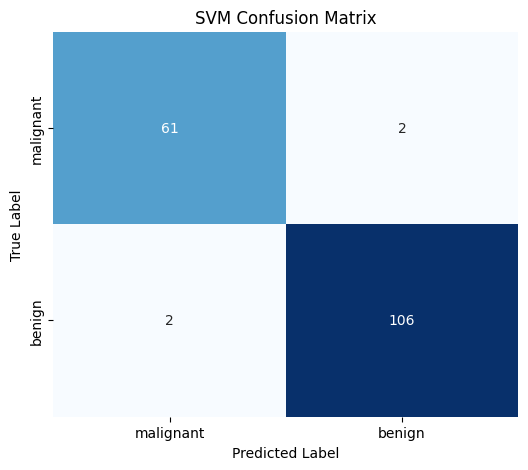

### SVM Confusion Matrix Visualization ###
----------------------------------------


In [51]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred = svm_clf.predict(X_test_scaled)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = cancer.target_names

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("### SVM Confusion Matrix Visualization ###")
print("-" * 40)

---## 44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

In [52]:
# Using the same synthetic regression data from Q23
X, y = make_regression(n_samples=500, n_features=10, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR
svr_rbf = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate using MAE
y_pred = svr_rbf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)

print("### SVR Evaluation using Mean Absolute Error (MAE) ###")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print("-" * 40)

### SVR Evaluation using Mean Absolute Error (MAE) ###
Mean Absolute Error (MAE): 50.4231
----------------------------------------


---## 45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.

In [53]:
# Load Breast Cancer dataset (Binary classification required for ROC-AUC)
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gaussian Naive Bayes Classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

# Get the probability of the positive class (column index 1)
y_proba = gnb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)

print("### Naïve Bayes Classifier ROC-AUC Score ###")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("-" * 40)

### Naïve Bayes Classifier ROC-AUC Score ###
ROC-AUC Score: 0.9922
----------------------------------------


---## 46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

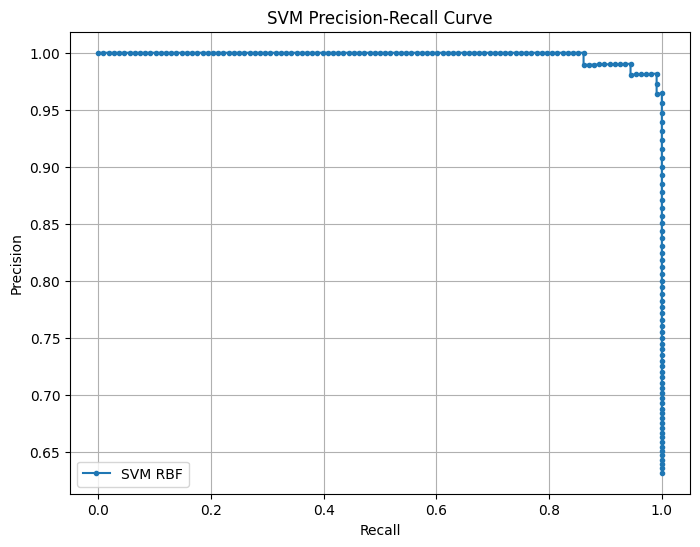

### SVM Precision-Recall Curve Visualization ###
----------------------------------------


In [54]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM Classifier (must enable probability estimates for the curve)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Get the probability of the positive class
y_proba = svm_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate precision and recall for all thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='SVM RBF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

print("### SVM Precision-Recall Curve Visualization ###")
print("-" * 40)